TO ANALYSE THE JOB MARKET AND AUTOMATION RISK

In [161]:
#importing all the models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score , r2_score , mean_squared_error


IMPORTING DATA SET 

In [162]:
# importing data set from file
df  = pd.read_csv(r"C:\Users\mansi\OneDrive\Desktop\project_domain_applications\dfall_clean.csv")
df.head(5)

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,permanent,full_time,40518.74,40518.74,40518.74,1,2025-09-22 09:28:13+00:00,2025-09-22,https://www.adzuna.co.uk/jobs/details/54104746...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxMDQ3NDYwOSIsI...
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,permanent,full_time,64000.00,64000.00,64000.00,0,2025-09-03 21:20:59+00:00,2025-09-03,https://www.adzuna.co.uk/jobs/details/53815190...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTM4MTUxOTAxMSIsI...
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,permanent,part_time,13.00,13.00,13.00,0,2025-09-08 15:49:25+00:00,2025-09-08,https://www.adzuna.co.uk/jobs/details/53893713...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,26707.00,29494.00,28100.50,0,2025-09-17 15:00:12+00:00,2025-09-17,https://www.adzuna.co.uk/jobs/details/54030979...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQwMzA5Nzk4NSIsI...
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,80000.00,NaN,80000.00,0,2025-09-15 17:51:23+00:00,2025-09-15,https://www.adzuna.co.uk/jobs/details/54003061...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...


In [163]:
print("shape of data set: ", df.shape)
print("columns of data set:" , df.columns)

shape of data set:  (4000, 20)
columns of data set: Index(['id', 'title', 'company_name', 'category_label', 'category_tag',
       'country', 'location_display', 'location_area', 'latitude', 'longitude',
       'contract_type', 'contract_time', 'salary_min', 'salary_max',
       'salary_mid', 'salary_is_predicted', 'created_dt', 'created_date',
       'redirect_url', 'adref'],
      dtype='object')


In [164]:
df.isnull().sum()

id                        0
title                     0
company_name            214
category_label            0
category_tag              0
country                   0
location_display          0
location_area             0
latitude                743
longitude               743
contract_type          3154
contract_time          3015
salary_min             2456
salary_max             2465
salary_mid             2456
salary_is_predicted       0
created_dt                0
created_date              0
redirect_url              0
adref                     0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4000 non-null   int64  
 1   title                4000 non-null   object 
 2   company_name         3786 non-null   object 
 3   category_label       4000 non-null   object 
 4   category_tag         4000 non-null   object 
 5   country              4000 non-null   object 
 6   location_display     4000 non-null   object 
 7   location_area        4000 non-null   object 
 8   latitude             3257 non-null   float64
 9   longitude            3257 non-null   float64
 10  contract_type        846 non-null    object 
 11  contract_time        985 non-null    object 
 12  salary_min           1544 non-null   float64
 13  salary_max           1535 non-null   float64
 14  salary_mid           1544 non-null   float64
 15  salary_is_predicted  4000 non-null   i

In [166]:
df.isnull()

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False


In [167]:
df.drop_duplicates(inplace = True)  #to remove duplicate if there is any

In [168]:
df.describe()

,id,latitude,longitude,salary_min,salary_max,salary_mid,salary_is_predicted
count,4.000000e+03,3257.000000,3257.000000,1.544000e+03,1.535000e+03,1.544000e+03,4000.000000
mean,5.316432e+09,46.967893,-8.814865,4.549448e+04,5.627804e+04,5.080285e+04,0.139750
std,2.036443e+08,5.306513,34.321400,9.365883e+04,2.223390e+05,1.567656e+05,0.346771
min,2.983960e+09,18.081052,-157.739444,0.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,5.322522e+09,43.934213,-1.499100,2.200000e+04,2.543800e+04,2.405000e+04,0.000000
50%,5.389136e+09,47.424029,4.919448,3.461617e+04,4.000000e+04,3.750000e+04,0.000000
75%,5.406462e+09,51.503378,8.518157,5.530624e+04,6.156134e+04,5.750000e+04,0.000000
max,5.418264e+09,57.579973,18.227159,2.000000e+06,5.000000e+06,3.500000e+06,1.000000


In [169]:

df['company_name'].fillna('unknown', inplace = True)
df['contract_type'].fillna('unknown' , inplace = True)
df['contract_time'].fillna('unknown' , inplace = True)

In [170]:
df.isnull().sum()

id                        0
title                     0
company_name              0
category_label            0
category_tag              0
country                   0
location_display          0
location_area             0
latitude                743
longitude               743
contract_type             0
contract_time             0
salary_min             2456
salary_max             2465
salary_mid             2456
salary_is_predicted       0
created_dt                0
created_date              0
redirect_url              0
adref                     0
dtype: int64

In [171]:
salary = ['salary_min' , 'salary_max' , 'salary_mid']

for i in salary:
    df[i]  = df.groupby('category_label')[i].transform(lambda x: x.fillna(x.median()))  #filling salary with respect to the category of label

In [172]:
#filling lpngitude and latitude as per location area 
df['latitude']  = df.groupby('location_area')['latitude'].transform(lambda x: x.fillna(x.median()))

df['longitude'] = df.groupby('location_area')['longitude'].transform(lambda x: x.fillna(x.median()))

TO CHECK OUTLIERS IN SALARY 

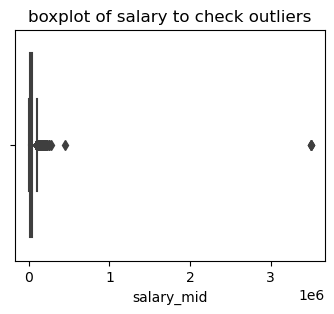

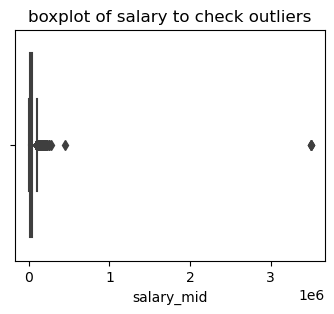

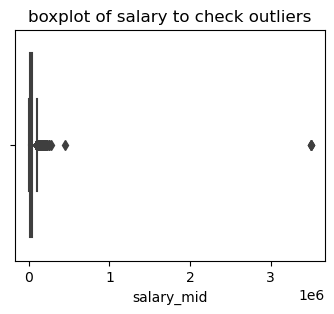

In [173]:
for col in salary:
    plt.figure(figsize = (4,3))
    sns.boxplot(x = df[i])
    plt.title("boxplot of salary to check outliers")
    plt.show()

THROUGH ABOVE PLOTTING IT IS CLEAR THERE ARE FEW JOBS WHICH HAVE EXTREMLY HIGH SALARY

In [174]:
for col in ['salary_min', 'salary_max', 'salary_mid']:
    print(f"{col} skewness: {df[col].skew()}")

# Log-transform highly skewed columns
for col in ['salary_min', 'salary_max', 'salary_mid']:
    if df[col].skew() > 1:
        df[col+'_log'] = np.log1p(df[col])  # log1p handles 0 values


salary_min skewness: 23.682503738873876
salary_max skewness: 31.666270138916317
salary_mid skewness: 29.71536576431182


FEATURE ENGINEERING 

In [175]:
df = pd.get_dummies(df, columns = ['contract_type','contract_time'], drop_first= True)
le  = LabelEncoder()
df['category_label_encoded']  = le.fit_transform(df['category_label'])


In [176]:
X = df.drop(['automation_risk', 'future_demand_score'], axis=1)
y = df['automation_risk']  # High/Low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['automation_risk', 'future_demand_score'] not found in axis"